In [159]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [160]:
data = pd.read_csv('base de datos de pizza.csv', index_col=0)
print(data)

                                Carne Molida  Chorizo  Jamón  Pepperoni  \
Usuario                                                                   
Tatiana Campos                             8        3      3          7   
juan agredo                                3        7      9         10   
Andrea Torrente                           10        8     10         10   
Yajhaira Naranjo                           9        9      8          9   
Juan Munera                               10       10     10         10   
Valeria Jiménez                            4        1      7          9   
Juan Andrés López                          7       10      6         10   
Andres Felipe Narvaez Estrella             3        7     10         10   
Luisa Tapiero                              7        9      9         10   
Alejandro Medina                           7        7      9          6   
NIcolas Orozco                             7        5      5          7   
Christian Aparicio       

In [161]:
user_dropdown = widgets.Dropdown(
    options=data.index,
    value=data.index[0],
    description='Usuario:'
)

In [162]:
def cosine_similarity(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [163]:
def get_cosine_similarity_matrix(data):
    n = len(data)
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            similarity_matrix[i][j] = cosine_similarity(data.iloc[i], data.iloc[j])
    return pd.DataFrame(similarity_matrix, index=data.index, columns=data.index)

cosine_similarity_matrix = get_cosine_similarity_matrix(data)

In [164]:
k_neighbors = widgets.IntSlider(
    value=5,
    min=1,
    max=len(data) - 1,
    step=1,
    description='Número de vecinos:',
    orientation='horizontal'
)

In [165]:
def get_k_neighbors(user, k):
    neighbors = cosine_similarity_matrix[user].sort_values(ascending=False)[1:k+1]
    distances = neighbors.values
    return neighbors, distances

In [166]:
def show_k_neighbors():
    user = user_dropdown.value
    k = k_neighbors.value
    neighbors, distances = get_k_neighbors(user, k)
    print(f'Los {k} vecinos más cercanos al usuario {user} son:\n{neighbors}')
    print(f'Las distancias entre el usuario {user} y los {k} vecinos más cercanos son:\n{distances}')

show_button = widgets.Button(description='Mostrar')

def on_show_button_clicked(button):
    show_k_neighbors()

show_button.on_click(on_show_button_clicked)

In [167]:
def plot_k_neighbors():
    user = user_dropdown.value
    k = k_neighbors.value
    neighbors, _ = get_k_neighbors(user, k)
    
    plt.figure(figsize=(8, 6))
    plt.barh(neighbors.index, neighbors.values)
    plt.axvline(cosine_similarity_matrix[user].mean(), color='red', linestyle='--', label='Media')
    plt.axvline(cosine_similarity_matrix[user].max(), color='green', linestyle='--', label='Máximo')
    plt.axvline(cosine_similarity_matrix[user].min(), color='blue', linestyle='--', label='Mínimo')
    plt.xlabel('Similitud coseno')
    plt.ylabel('Usuario')
    plt.title(f'Los {k} vecinos más cercanos al usuario {user}')
    plt.legend()
    plt.show()
    
plot_button = widgets.Button(description='Representar gráficamente')

def on_plot_button_clicked(button):
    plot_k_neighbors()
    
plot_button.on_click(on_plot_button_clicked)


Dropdown(description='Usuario:', options=('Tatiana Campos', 'juan agredo', 'Andrea Torrente', 'Yajhaira Naranj…

IntSlider(value=5, description='Número de vecinos:', max=19, min=1)

Button(description='Mostrar', style=ButtonStyle())

Button(description='Representar gráficamente', style=ButtonStyle())

Los 5 vecinos más cercanos al usuario Tatiana Campos son:
Usuario
Sebastian Mosquera           0.869433
Valeria Jiménez              0.855447
Isabella Pinzon              0.837826
Andrés Camilo Gómez Amaya    0.834543
Christian Aparicio           0.820591
Name: Tatiana Campos, dtype: float64
Las distancias entre el usuario Tatiana Campos y los 5 vecinos más cercanos son:
[0.86943283 0.85544672 0.83782582 0.83454286 0.82059149]


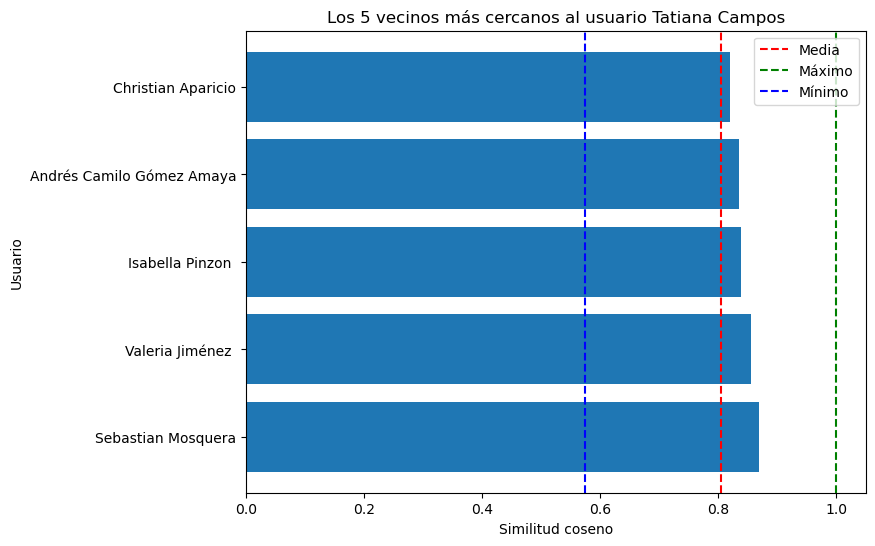

In [168]:
display(user_dropdown)
display(k_neighbors)
display(show_button)

display(plot_button)